## Bunker Oil Presence Notebook

Fifth figure request for Stephanie


In [1]:
from cartopy import crs, feature
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import matplotlib.cm as mcm
import numpy as np
from scipy.ndimage.filters import gaussian_filter
import xarray as xr

%matplotlib inline

In [2]:
landcolour = 'papayawhip'
plt.rcParams['font.size'] = 15

In [3]:
#mesh = xr.open_dataset('~/MEOPAR/grid/mesh_mask201702.nc')
mesh = xr.open_dataset('/home/sallen/Documents/MEOPAR/grid/mesh_mask201702.nc')
tmask = 1- mesh.tmask[0, 0]

In [4]:
#data3d = xr.open_dataset('/data/sallen/results/MIDOSS/Monte_Carlo/first240_oilpresence.nc')
data3d = xr.open_dataset('~/Documents/MIDOSS/MIDOSS_aggregated_merged.nc')

In [5]:
jmin, jmax = data3d.x.values[0]+1, data3d.x.values[-1]+2
imin, imax = data3d.y.values[0]+1, data3d.y.values[-1]+2

In [7]:
data3d.O

<xarray.DataArray 'OilType' (RunId: 723)>
array(['diesel', 'diesel', 'diesel', ..., 'diesel', 'bunker', 'diesel'],
      dtype=object)
Coordinates:
  * RunId    (RunId) object 'A-0' 'A-1' 'A-10' 'A-11' ... 'E-97' 'E-98' 'E-99'

WaterColumnOilVol_surface_presence.values is the maximum value in time at the surface at a given i, j for a given run.

In [17]:
#oil = np.zeros_like(raw.values[0])
oil_array = (data3d.OilWaterColumnOilVol_surface_presence[data3d.OilType== 'bunker'] > 
              0.001).astype(int).mean(axis=0)
print (oil_array.max(), oil_array.shape)
oil = np.ma.masked_array(oil_array, oil_array < 0.001)  #mask anything less than 0.1%
print (oil.mask.min())

<xarray.DataArray 'OilWaterColumnOilVol_surface_presence' ()>
array(0.21693122) (270, 240)
False


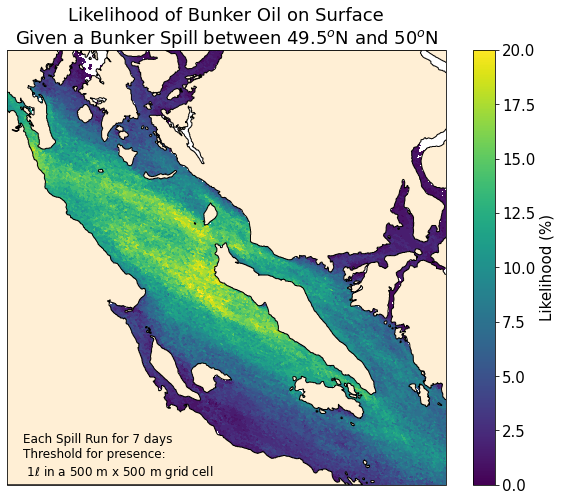

In [21]:
fig = plt.figure(figsize=(10, 8))
xlim, ylim = [-125.3, -123.9], [49.3, 50.2]
ax = plt.axes(projection=crs.Mercator(np.mean(xlim), *ylim))
ax.set_extent(xlim + ylim)
ax.add_feature(feature.GSHHSFeature('full', edgecolor='k', facecolor=landcolour))
C = ax.pcolormesh(
    mesh.nav_lon[imin:imax, jmin:jmax], mesh.nav_lat[imin:imax, jmin:jmax], oil*100, vmax=20, vmin=0,
    transform=crs.PlateCarree(), zorder=0,
)
#cont = ax.contour(
#    mesh.nav_lon[imin:imax, jmin:jmax], mesh.nav_lat[imin:imax, jmin:jmax], smooth*100, np.arange(0, 0.22, 0.02)*100,
#    extend='both', transform=crs.PlateCarree(), zorder=3, levels=[4, 8, 12, 16],
#    colors=mcm.gray_r(np.arange(5)/5 + 0.15)
#)
cb = fig.colorbar(C, ax=ax);
#cb.add_lines(cont)
cb.set_label('Likelihood (%)')
ax.set_title("Likelihood of Bunker Oil on Surface\nGiven a Bunker Spill between 49.5$^o$N and 50$^o$N");
ax.text(-125.25, 49.32, 'Each Spill Run for 7 days\nThreshold for presence:\n 1$\ell$ in a 500 m x 500 m grid cell',
       transform=crs.PlateCarree(), fontsize=12)
fig.savefig('ProbabilityBunker_3E_pcolor.png')